In [3]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import time
from decimal import Context, setcontext
from decimal import Decimal as Dm

In [48]:
from decimal import Decimal, getcontext

# Define a function to measure the execution time of a function
def measure_execution_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time

# Calculate Pi using the BBP formula
def bbp_formula(n):
    pi = Decimal(0)
    k = 0
    while k < n:
        pi += (Decimal(1)/(16**k))*((Decimal(4)/(8*k+1))-(Decimal(2)/(8*k+4))-(Decimal(1)/(8*k+5))-(Decimal(1)/(8*k+6)))
        k += 1
    return pi

# Calculate Pi using the Chudnovsky algorithm
def chudnovsky_algorithm(n):
    pi = Decimal(0)
    k = 0
    while k < n:
        pi += Decimal(Decimal(-1)**k)*Decimal(Decimal(math.factorial(6*k))/Decimal((math.factorial(k)**3)*\
            Decimal(math.factorial(3*k)))*(Decimal(13591409+545140134*k)/(Decimal(640320)**(3*k))))
        k += 1
    pi = pi * Decimal(10005).sqrt()/Decimal(4270934400)
    pi = pi**(-1)
    return pi

# Calculate Pi using the Monte Carlo method
def monte_carlo_method(n):
    inside = 0
    total = n ** 2
    for i in range(total):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            inside += 1
    pi = 4*(inside/total)
    return pi

In [66]:
getcontext().prec = 1000

# List of number of iterations to try
n_list = [10, 50, 100, 200, 300, 500, 800, 1000, 1200, 1500]

pi1 = []
pi1_time = []

pi2 = []
pi2_time = []

pi3 = []
pi3_time = []


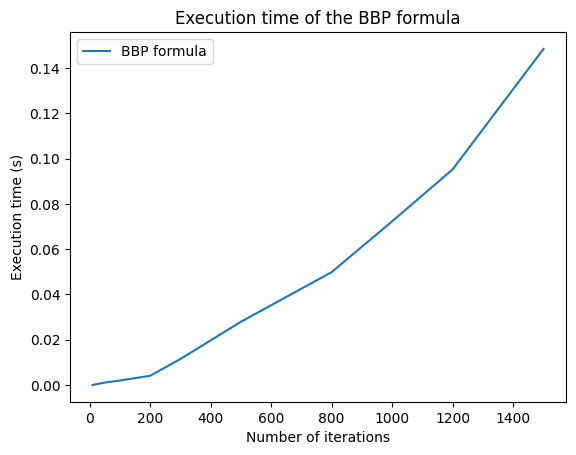

In [67]:
for n in n_list:
    pi_bbp, time_bbp = measure_execution_time(bbp_formula, n)
    pi1.append(pi_bbp)
    pi1_time.append(time_bbp)

# plot the execution time of the BBP formula
plt.plot(n_list, pi1_time, label='BBP formula')
plt.xlabel('Number of iterations')
plt.ylabel('Execution time (s)')
plt.title('Execution time of the BBP formula')
plt.legend()
plt.show()

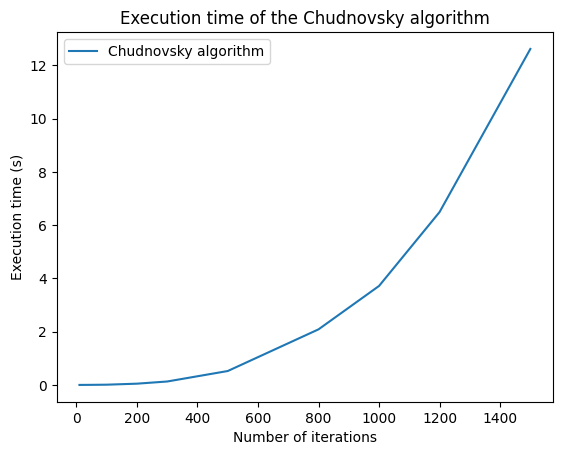

In [68]:
for n in n_list:
    pi_chudnovsky, time_chudnovsky = measure_execution_time(chudnovsky_algorithm, n)
    pi2.append(pi_chudnovsky)
    pi2_time.append(time_chudnovsky)

# plot the execution time of the Chudnovsky algorithm
plt.plot(n_list, pi2_time, label='Chudnovsky algorithm')
plt.xlabel('Number of iterations')
plt.ylabel('Execution time (s)')
plt.title('Execution time of the Chudnovsky algorithm')
plt.legend()
plt.show()

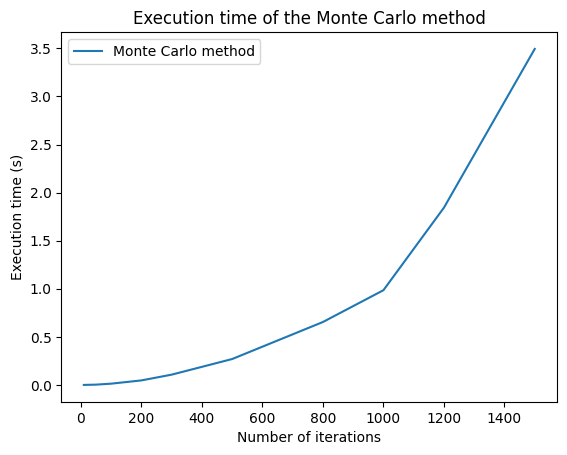

In [69]:
for n in n_list:
    pi_mc, time_mc = measure_execution_time(monte_carlo_method, n)
    pi3.append(pi_mc)
    pi3_time.append(time_mc)

# plot the execution time of the Monte Carlo method
plt.plot(n_list, pi3_time, label='Monte Carlo method')
plt.xlabel('Number of iterations')
plt.ylabel('Execution time (s)')
plt.title('Execution time of the Monte Carlo method')
plt.legend()
plt.show()

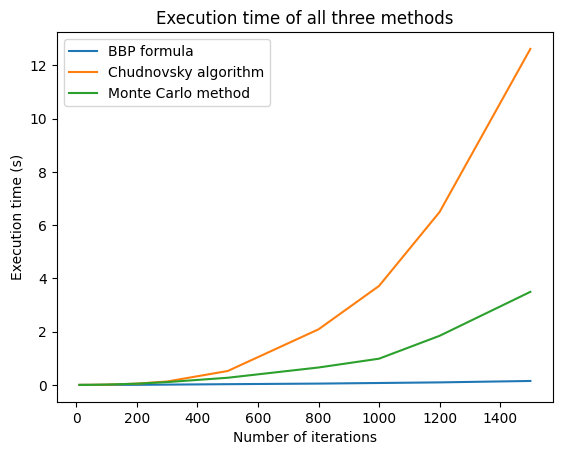

In [70]:
# plot the execution time of all three methods
plt.plot(n_list, pi1_time, label='BBP formula')
plt.plot(n_list, pi2_time, label='Chudnovsky algorithm')
plt.plot(n_list, pi3_time, label='Monte Carlo method')
plt.xlabel('Number of iterations')
plt.ylabel('Execution time (s)')
plt.title('Execution time of all three methods')
plt.legend()
plt.show()